In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [95]:
diffs_df = pd.read_csv("fixed_size_set.csv")
dyn_df = pd.read_csv("dynamic_size_set.csv")

 Executando várias vezes com o mesmo tamannho de estrutura retorna uma visão clara da confiabilidade e eficiencia de cada uma das estruturas em sua busca.

mediana de comparações na lista: 1150.5
mediana de comparações na bst: 14.0
BST é 82 vezes melhor que a lista nessa situação


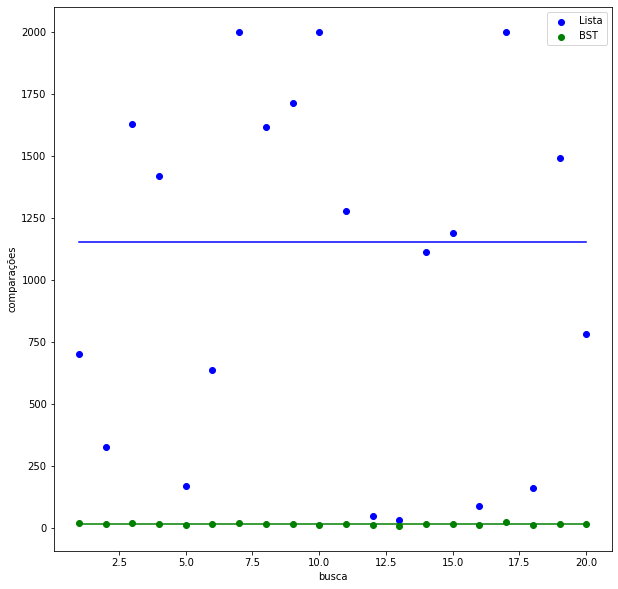

In [96]:
reruns_f = diffs_df.last_valid_index()+1
X = range(1, reruns_f+1)
all_bst = [abs(val) for val in list(diffs_df.bst)]
all_lista = [abs(val) for val in list(diffs_df.lista)]
m_lista, m_bst = np.median(all_lista), np.median(all_bst)
print(f"mediana de comparações na lista: {m_lista}\nmediana de comparações na bst: {m_bst}\nBST é {m_lista/m_bst:.0f} vezes melhor que a lista nessa situação")

plt.scatter(X, all_lista, color="blue", label="Lista")
plt.plot(X, reruns_f*[m_lista], color="blue")
plt.scatter(X, all_bst, color="green", label="BST")
plt.plot(X, reruns_f*[m_bst], color="green")

plt.rcParams["figure.figsize"] = (20,3)
plt.legend()
plt.xlabel("busca")
plt.ylabel("comparações")
plt.rcParams["figure.figsize"] = (20,5)

Já comparando o tamanho do dataset com as comparações de busca, temos algo assim:

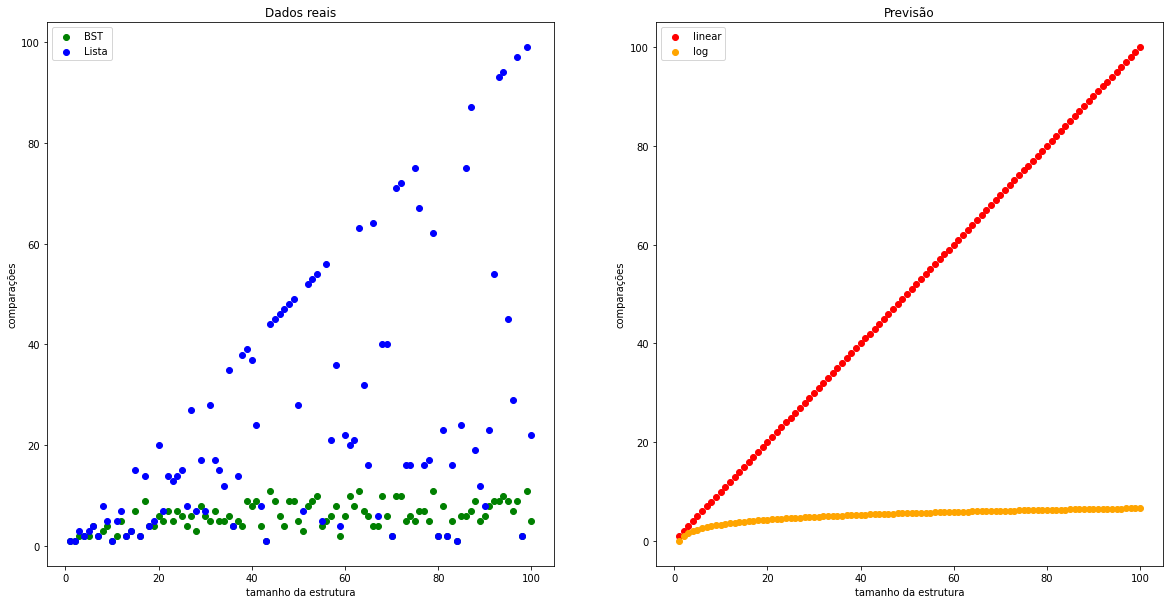

In [120]:
X = dyn_df.search_pool_size
all_bst = [abs(val) for val in list(dyn_df.bst)]
all_lista = [abs(val) for val in list(dyn_df.lista)]

fig, ax = plt.subplots(1,2)
ax[0].scatter(X, all_bst, color="green", label="BST")
ax[0].scatter(X, all_lista, color="blue", label="Lista")
ax[0].set_title("Dados reais")
ax[0].set_xlabel("tamanho da estrutura")
ax[0].set_ylabel("comparações")
ax[0].legend()

ax[1].scatter(X, X, color="red", label="linear")
ax[1].scatter(X, np.log2(X), color="orange", label="log")
ax[1].set_title("Previsão")
ax[1].set_xlabel("tamanho da estrutura")
ax[1].set_ylabel("comparações")
ax[1].legend()

plt.rcParams["figure.figsize"] = (20,10)